In [1]:
data = [i.strip('\n').split('\t') for i in open('/Users/Diego/Documents/School/ISTA539/final-project-dalcantara7/openclass_prize.train', 'r', encoding='utf8', errors='ignore')]
print(data[0])
print(" ")
print(data[1])

['What is the Turing Test?', 'The original Turing test involved three entities communicating with each other through computer terminals in separate rooms - a computer program trying to pass itself off as a human, a human trying to prove that she or he is human, and a human judge deciding which of the competitors is human and which a machine. This is different from the popular idea that it\'s about a human judging whether one subject is human or machine. The reason it\'s different is that Turing\'s original proposal was not intended as a practical test, but rather as a thought experiment making a philosophical argument - that it is impossible to determine whether something is "intelligent" better than by judging its linguistic interactions, and that therefore a machine that sounds intelligent has to be considered truly intelligent. And by "intelligent," Turing meant, like a human, with consciousness.', 'Which of the following is NOT an objection to the Turing Test mentioned in the readi

In [2]:
X = []
Y = []
for i in range(len(data)):
    if i % 2 == 0:
        X.append(' '.join(data[i]))
    else:
        Y.append(data[i])

print(X[0:3])
print(" ")
print(Y[0:5])

['What is the Turing Test? The original Turing test involved three entities communicating with each other through computer terminals in separate rooms - a computer program trying to pass itself off as a human, a human trying to prove that she or he is human, and a human judge deciding which of the competitors is human and which a machine. This is different from the popular idea that it\'s about a human judging whether one subject is human or machine. The reason it\'s different is that Turing\'s original proposal was not intended as a practical test, but rather as a thought experiment making a philosophical argument - that it is impossible to determine whether something is "intelligent" better than by judging its linguistic interactions, and that therefore a machine that sounds intelligent has to be considered truly intelligent. And by "intelligent," Turing meant, like a human, with consciousness. Which of the following is NOT an objection to the Turing Test mentioned in the reading? In

In [3]:
from collections import Counter

all_labels = [label for list in Y for label in list]
counter = Counter(all_labels)

n_most_common = counter.most_common()
index = -1

for j in range(len(n_most_common)):
    if n_most_common[j][1] < 2:
        index = j
        break

index

112

~~Toss out labels with fewer than 2 occurrences~~

In [4]:
# for i in range(len(n_most_common)):
#     if n_most_common[i][1] < 2:
#         for j in range(len(Y)):
#             if n_most_common[i][0] in Y[j]:
#                 Y[j].remove(n_most_common[i][0])


# Y[0]

In [4]:
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, f1_score
import pandas as pd
import numpy as np

vectorizer = TfidfVectorizer()
X_trans = vectorizer.fit_transform(X)

mlb = MultiLabelBinarizer()
class_labels = mlb.fit_transform(Y)

all_labels = [label for list in Y for label in list]
counter = Counter(all_labels)

indexes = {val : idx + 1 for idx, val in enumerate(mlb.classes_)} 
X_train, X_test, Y_train, Y_test = train_test_split(X_trans, class_labels, test_size=0.2, random_state=666)

In [6]:
def train_and_inc_classes(classifier, X_train, Y_train, X_test, Y_test, counter):
    outer_frame = []

#start for loop
    for i in range(1, index):
        n_most_common = counter.most_common(i)
        only_labels = [tuple[0] for tuple in n_most_common]

        for j in range(len(Y_train)):
            new_labels = np.zeros(class_labels[0].shape)
            for label in only_labels:
                new_labels[indexes[label] - 1] = 1
            Y_train[j] = new_labels

        clf = classifier.fit(X_train, Y_train)
        predictions = clf.predict(X_test)

        scores = []
        sum_ = 0
        precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='macro')
        f2_score = (5 *  precision * recall) / (4 * (precision+recall))
        sum_ += f2_score
        scores.append(f2_score)
        precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='micro')
        f2_score = (5 *  precision * recall) / (4 * (precision+recall))
        sum_ += f2_score
        scores.append(f2_score)
        precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='weighted')
        f2_score = (5 *  precision * recall) / (4 * (precision+recall))
        sum_ += f2_score
        scores.append(f2_score)
        scores.append(sum_ / 3)
        outer_frame.append(scores)

    columns = ['macro', 'micro', 'weighted', 'average']
    df = pd.DataFrame(outer_frame, columns = columns)
    return df
    

rn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/s

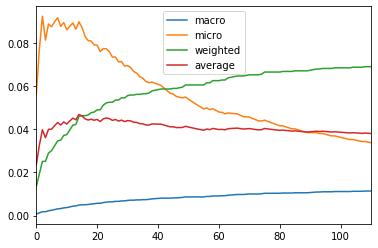

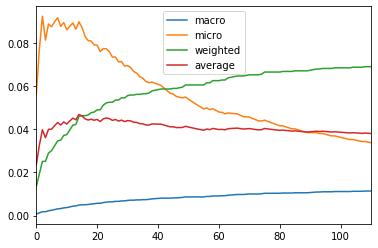

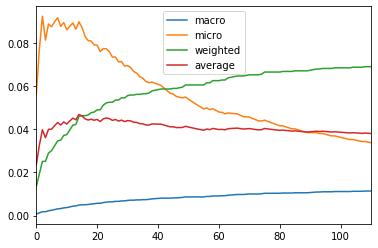

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr = OneVsRestClassifier(LogisticRegression(solver='saga', max_iter=50))
nb = OneVsRestClassifier(MultinomialNB())
rf = RandomForestClassifier()

df = train_and_inc_classes(lr, X_train, Y_train, X_test, Y_test, counter)
df.plot(kind='line')
df.to_csv('/classifier_outputs/scoresLR.csv', index=False)
df = train_and_inc_classes(nb, X_train, Y_train, X_test, Y_test, counter)
df.plot(kind='line')
df.to_csv('/classifier_outputs/scoresNB.csv', index=False)
df = train_and_inc_classes(rf, X_train, Y_train, X_test, Y_test, counter)
df.plot(kind='line')
df.to_csv('/classifier_outputs/scoresRF.csv', index=False)

# Below this line not used anymore 

_____

## Logistic Regression

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_trans, class_labels, test_size=0.2, random_state=666)

outer_frame = []

#start for loop
for i in range(1, class_labels.shape[1]):
    n_most_common = counter.most_common(i)
    only_labels = [tuple[0] for tuple in n_most_common]

    for j in range(len(Y_train)):
        new_labels = np.zeros(class_labels[0].shape)
        for label in only_labels:
            new_labels[indexes[label] - 1] = 1
        Y_train[j] = new_labels

    clf = OneVsRestClassifier(LogisticRegression(solver='saga', max_iter=50, class_weight={0:1, 1:50})).fit(X_train, Y_train)
    predictions = clf.predict(X_test)

    scores = []
    sum_ = 0
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='macro')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    sum_ += f2_score
    scores.append(f2_score)
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='micro')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    sum_ += f2_score
    scores.append(f2_score)
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='weighted')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    sum_ += f2_score
    scores.append(f2_score)
    scores.append(sum_ / 3)
    outer_frame.append(scores)

columns = ['macro', 'micro', 'weighted', 'average']
df = pd.DataFrame(outer_frame, columns = columns)
df.to_csv('scoresLR.csv', index=False)

  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 190 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 191 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 192 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 193 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 194 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 195 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 196 is present in all training ex

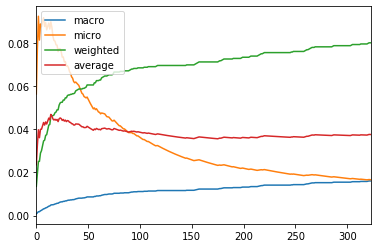

In [9]:
df.plot(kind='line')

## Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, Y_train, Y_test = train_test_split(X_trans, class_labels, test_size=0.2, random_state=666)

outer_frame = []

#start for loop
for i in range(1, class_labels.shape[1]):
    n_most_common = counter.most_common(i)
    only_labels = [tuple[0] for tuple in n_most_common]

    for j in range(len(Y_train)):
        new_labels = np.zeros(class_labels[0].shape)
        for label in only_labels:
            new_labels[indexes[label] - 1] = 1
        Y_train[j] = new_labels

    clf = OneVsRestClassifier(MultinomialNB()).fit(X_train, Y_train)
    predictions = clf.predict(X_test)

    scores = []
    sum_ = 0
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='macro')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    sum_ += f2_score
    scores.append(f2_score)
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='micro')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    sum_ += f2_score
    scores.append(f2_score)
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='weighted')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    sum_ += f2_score
    scores.append(f2_score)
    scores.append(sum_ / 3)
    outer_frame.append(scores)

columns = ['macro', 'micro', 'weighted', 'average']
df1 = pd.DataFrame(outer_frame, columns = columns)
df1.to_csv('scoresNB.csv', index=False)

  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 190 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 191 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 192 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 193 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 194 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 195 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 196 is present in all training ex

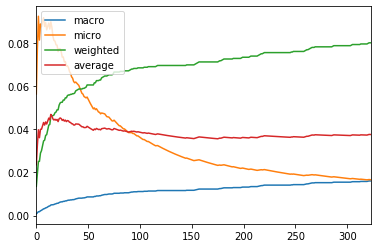

In [11]:
df1.plot(kind='line')

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X_trans, class_labels, test_size=0.2, random_state=666)

outer_frame = []

#start for loop
for i in range(1, class_labels.shape[1]):
    n_most_common = counter.most_common(i)
    only_labels = [tuple[0] for tuple in n_most_common]

    for j in range(len(Y_train)):
        new_labels = np.zeros(class_labels[0].shape)
        for label in only_labels:
            new_labels[indexes[label] - 1] = 1
        Y_train[j] = new_labels

    clf = RandomForestClassifier().fit(X_train, Y_train)
    predictions = clf.predict(X_test)

    scores = []
    sum_ = 0
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='macro')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    sum_ += f2_score
    scores.append(f2_score)
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='micro')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    sum_ += f2_score
    scores.append(f2_score)
    precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='weighted')
    f2_score = (5 *  precision * recall) / (4 * (precision+recall))
    sum_ += f2_score
    scores.append(f2_score)
    scores.append(sum_ / 3)
    outer_frame.append(scores)

columns = ['macro', 'micro', 'weighted', 'average']
df2 = pd.DataFrame(outer_frame, columns = columns)
df2.to_csv('scoresRF.csv', index=False)

0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', 

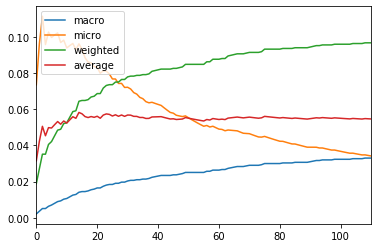

In [11]:
df2.plot(kind='line')